# **Importing all The Necessary Libraries and Dataset**

This project focuses on applying predictive analytics to estimate food delivery times based on factors like distance, traffic, and weather. We implemented models such as Linear Regression, Polynomial Regression, K-Nearest Neighbors, and Decision Trees to improve accuracy. By leveraging historical data and machine learning, the goal is to help food delivery services reduce delays, improve customer satisfaction, and boost operational efficiency—especially during peak demand periods.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [2]:
dataset = pd.read_csv('/kaggle/input/food-delivery-time/Food_Time new.csv')

# **Cleaning the Data**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   ID                           10000 non-null  object 
 2   Delivery_person_ID           10000 non-null  object 
 3   weather_description          9995 non-null   object 
 4   Type_of_order                10000 non-null  object 
 5   Type_of_vehicle              10000 non-null  object 
 6   Delivery_person_Age          10000 non-null  int64  
 7   Delivery_person_Ratings      10000 non-null  float64
 8   Restaurant_latitude          10000 non-null  object 
 9   Restaurant_longitude         10000 non-null  object 
 10  Delivery_location_latitude   10000 non-null  object 
 11  Delivery_location_longitude  10000 non-null  object 
 12  temperature                  9995 non-null   float64
 13  humidity         

In [4]:
dataset.head(10)

,Traffic_Level,ID,Delivery_person_ID,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET
0,High,70A2,CHENRES12DEL01,mist,Snack,scooter,32,4.6,12.972.793,80.249.982,13.012.793,80.289.982,26.55,87.0,0.0,9.89,43.45
1,High,95B4,RANCHIRES15DEL01,clear sky,Meal,scooter,33,4.7,23.369.746,8.533.982,23.479.746,8.544.982,17.51,69.0,0.0,19.11,3.816.666.667
2,High,CDCD,DEHRES17DEL01,clear sky,Snack,motorcycle,36,4.2,30.327.968,78.046.106,30.397.968,78.116.106,12.44,77.0,0.0,11.59,3.636.666.667
3,High,2784,PUNERES13DEL03,clear sky,Drinks,scooter,23,4.7,1.856.245,73.916.619,1.865.245,74.006.619,19.37,65.0,0.0,21.93,49.45
4,High,6F67,HYDRES14DEL01,overcast clouds,Snack,motorcycle,34,4.9,17.426.228,78.407.495,17.496.228,78.477.495,21.29,64.0,0.0,18.26,5.248.333.333
5,High,539B,MUMRES02DEL01,clear sky,Buffet,motorcycle,25,4.0,19.221.315,72.862.381,19.261.315,72.902.381,24.51,47.0,0.0,8.97,3.461.666.667
6,High,8BC0,SURRES15DEL03,clear sky,Drinks,scooter,35,4.3,21.160.522,72.771.477,21.250.522,72.861.477,22.92,43.0,0.0,16.08,4.416.666.667
7,High,30C8,PUNERES19DEL02,clear sky,Drinks,scooter,32,4.6,18.563.934,73.915.367,18.693.935,74.045.367,19.15,64.0,0.0,26.35,5.438.333.333
8,High,B843,PUNERES02DEL01,clear sky,Snack,motorcycle,33,4.9,1.855.144,73.804.855,1.862.144,73.874.855,18.97,65.0,0.0,17.24,4.746.666.667
9,High,9B18,BANGRES17DEL01,mist,Snack,motorcycle,22,4.8,12.972.532,77.608.179,13.042.532,77.678.179,19.70,93.0,0.0,12.08,4.728.333.333


In [5]:
dataset.rename(columns={'temperature': 'temperature_c', 'TARGET': 'delivery_time_minutes'}, inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   ID                           10000 non-null  object 
 2   Delivery_person_ID           10000 non-null  object 
 3   weather_description          9995 non-null   object 
 4   Type_of_order                10000 non-null  object 
 5   Type_of_vehicle              10000 non-null  object 
 6   Delivery_person_Age          10000 non-null  int64  
 7   Delivery_person_Ratings      10000 non-null  float64
 8   Restaurant_latitude          10000 non-null  object 
 9   Restaurant_longitude         10000 non-null  object 
 10  Delivery_location_latitude   10000 non-null  object 
 11  Delivery_location_longitude  10000 non-null  object 
 12  temperature_c                9995 non-null   float64
 13  humidity         

In [7]:
dataset.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'ID', 'Delivery_person_ID'], axis = 'columns', inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Traffic_Level            9085 non-null   object 
 1   weather_description      9995 non-null   object 
 2   Type_of_order            10000 non-null  object 
 3   Type_of_vehicle          10000 non-null  object 
 4   Delivery_person_Age      10000 non-null  int64  
 5   Delivery_person_Ratings  10000 non-null  float64
 6   temperature_c            9995 non-null   float64
 7   humidity                 9995 non-null   float64
 8   precipitation            9995 non-null   float64
 9   Distance (km)            9080 non-null   float64
 10  delivery_time_minutes    9459 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 859.5+ KB


In [9]:
dataset.isnull().sum()

Traffic_Level              915
weather_description          5
Type_of_order                0
Type_of_vehicle              0
Delivery_person_Age          0
Delivery_person_Ratings      0
temperature_c                5
humidity                     5
precipitation                5
Distance (km)              920
delivery_time_minutes      541
dtype: int64

In [10]:
def convert_time(x):
    try:

        x = str(x)

        if x.count('.') > 1:
            x = x.replace('.', '')

        num = float(x)

        if len(x) > 5:
            return round(num / 60000000, 2)
        else:
            return num
    except ValueError:
        return None

dataset['delivery_time_minutes'] = dataset['delivery_time_minutes'].apply(convert_time)

In [11]:
dataset.head(10)

,Traffic_Level,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,temperature_c,humidity,precipitation,Distance (km),delivery_time_minutes
0,High,mist,Snack,scooter,32,4.6,26.55,87.0,0.0,9.89,43.45
1,High,clear sky,Meal,scooter,33,4.7,17.51,69.0,0.0,19.11,63.61
2,High,clear sky,Snack,motorcycle,36,4.2,12.44,77.0,0.0,11.59,60.61
3,High,clear sky,Drinks,scooter,23,4.7,19.37,65.0,0.0,21.93,49.45
4,High,overcast clouds,Snack,motorcycle,34,4.9,21.29,64.0,0.0,18.26,87.47
5,High,clear sky,Buffet,motorcycle,25,4.0,24.51,47.0,0.0,8.97,57.69
6,High,clear sky,Drinks,scooter,35,4.3,22.92,43.0,0.0,16.08,73.61
7,High,clear sky,Drinks,scooter,32,4.6,19.15,64.0,0.0,26.35,90.64
8,High,clear sky,Snack,motorcycle,33,4.9,18.97,65.0,0.0,17.24,79.11
9,High,mist,Snack,motorcycle,22,4.8,19.70,93.0,0.0,12.08,78.81


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Traffic_Level            9085 non-null   object 
 1   weather_description      9995 non-null   object 
 2   Type_of_order            10000 non-null  object 
 3   Type_of_vehicle          10000 non-null  object 
 4   Delivery_person_Age      10000 non-null  int64  
 5   Delivery_person_Ratings  10000 non-null  float64
 6   temperature_c            9995 non-null   float64
 7   humidity                 9995 non-null   float64
 8   precipitation            9995 non-null   float64
 9   Distance (km)            9080 non-null   float64
 10  delivery_time_minutes    9040 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 859.5+ KB


In [13]:
cat_cols = []
num_cols = []

for column in dataset.columns:
    if dataset[column].dtype == 'object':
        cat_cols.append(column)
    else:
        num_cols.append(column)

In [14]:
cat_cols

['Traffic_Level', 'weather_description', 'Type_of_order', 'Type_of_vehicle']

In [15]:
num_cols

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'temperature_c',
 'humidity',
 'precipitation',
 'Distance (km)',
 'delivery_time_minutes']

In [16]:
dataset.sample(10)

,Traffic_Level,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,temperature_c,humidity,precipitation,Distance (km),delivery_time_minutes
6357,Moderate,haze,Snack,motorcycle,33,4.9,22.96,60.0,0.0,11.47,31.85
1158,High,overcast clouds,Snack,motorcycle,32,4.6,21.27,64.0,0.0,20.79,81.86
2350,High,clear sky,Meal,motorcycle,27,4.5,22.23,44.0,0.0,19.08,36.45
1813,High,haze,Buffet,motorcycle,38,4.6,26.26,73.0,0.0,29.81,78.44
9556,Very Low,broken clouds,Drinks,scooter,26,4.3,21.43,64.0,0.0,2.64,20.75
4442,Low,mist,Meal,motorcycle,30,4.6,28.33,81.0,0.0,7.31,34.56
6148,Moderate,haze,Snack,motorcycle,23,4.9,22.77,72.0,0.0,7.00,58.31
895,High,mist,Meal,scooter,32,4.8,19.89,92.0,0.0,12.40,59.64
2961,Low,haze,Snack,motorcycle,22,4.2,17.18,72.0,0.0,3.93,30.97
4092,Low,smoke,Meal,motorcycle,37,4.8,28.01,57.0,0.0,3.46,20.70


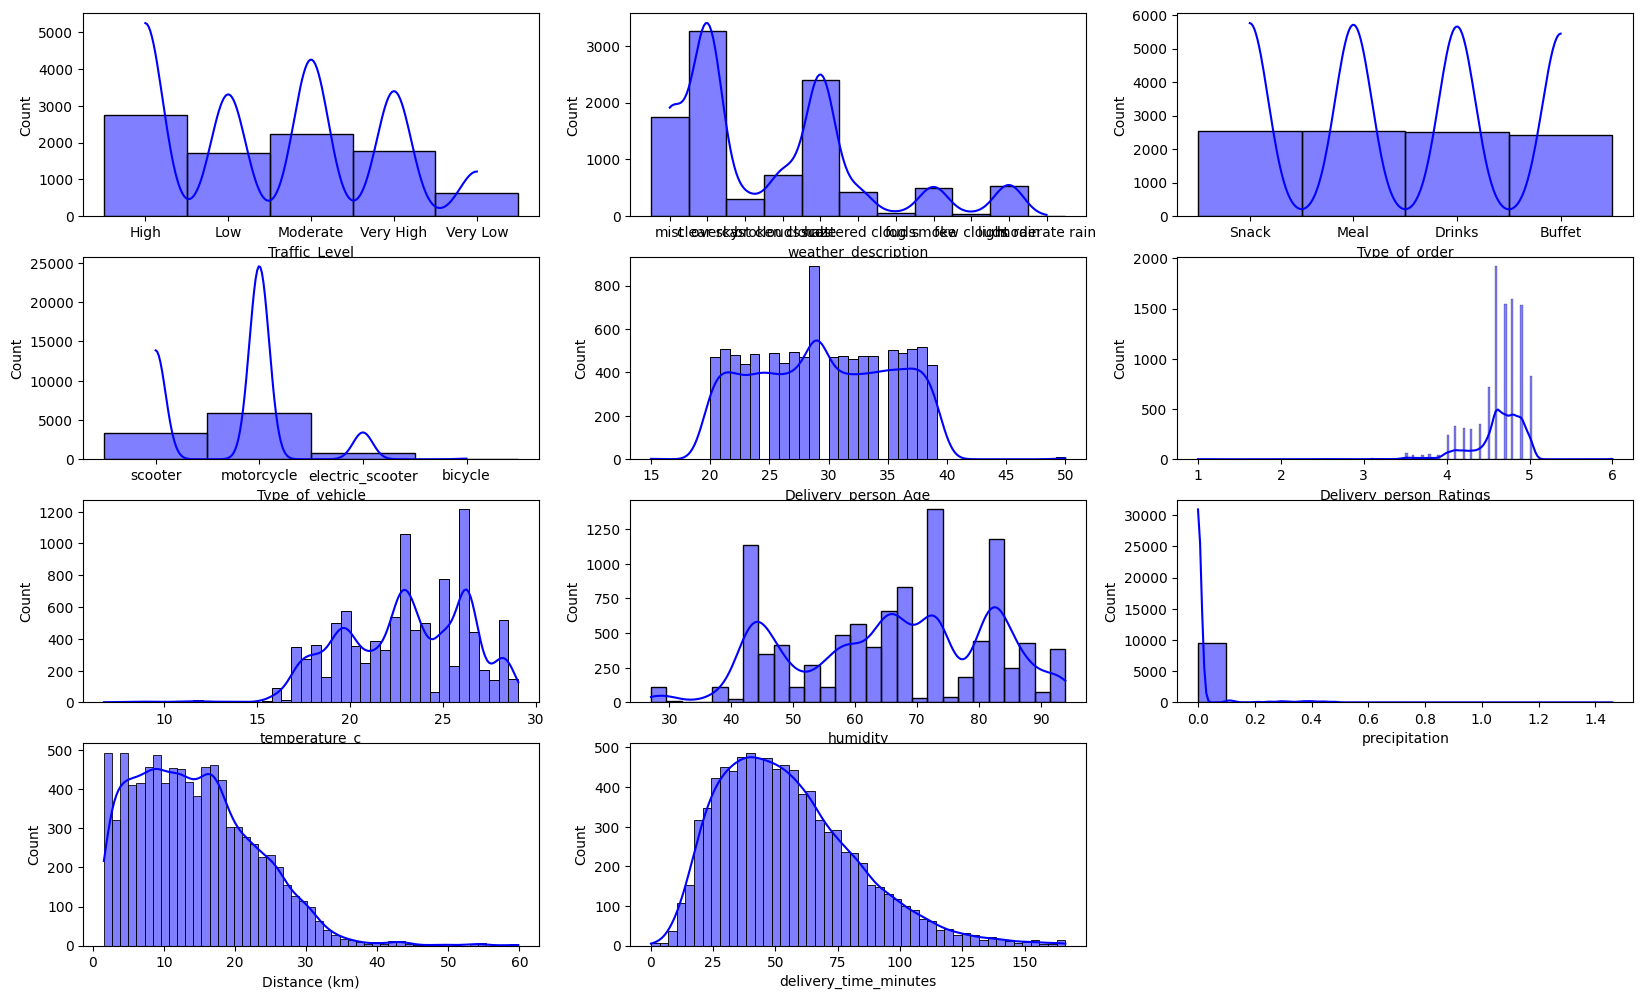

In [17]:
plt.figure(figsize=(20, 50))
for i, col in enumerate(dataset.columns):
    plt.subplot(16, 3, i + 1)
    sns.histplot(data=dataset, x=col, kde=True, color = 'blue')

In [18]:
dataset_cleaned = dataset.copy()
indexes_to_drop = []
for i in range(len(dataset_cleaned)):
    if pd.isna(dataset_cleaned.loc[i, 'delivery_time_minutes']):
        indexes_to_drop.append(i)
dataset_cleaned = dataset_cleaned.drop(indexes_to_drop)
dataset_cleaned = dataset_cleaned.reset_index(drop=True)

In [19]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9040 entries, 0 to 9039
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Traffic_Level            9040 non-null   object 
 1   weather_description      9040 non-null   object 
 2   Type_of_order            9040 non-null   object 
 3   Type_of_vehicle          9040 non-null   object 
 4   Delivery_person_Age      9040 non-null   int64  
 5   Delivery_person_Ratings  9040 non-null   float64
 6   temperature_c            9040 non-null   float64
 7   humidity                 9040 non-null   float64
 8   precipitation            9040 non-null   float64
 9   Distance (km)            9035 non-null   float64
 10  delivery_time_minutes    9040 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 777.0+ KB


In [20]:
dataset_cleaned['Distance (km)'].fillna(dataset_cleaned['Distance (km)'].mean(), inplace=True)

In [21]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9040 entries, 0 to 9039
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Traffic_Level            9040 non-null   object 
 1   weather_description      9040 non-null   object 
 2   Type_of_order            9040 non-null   object 
 3   Type_of_vehicle          9040 non-null   object 
 4   Delivery_person_Age      9040 non-null   int64  
 5   Delivery_person_Ratings  9040 non-null   float64
 6   temperature_c            9040 non-null   float64
 7   humidity                 9040 non-null   float64
 8   precipitation            9040 non-null   float64
 9   Distance (km)            9040 non-null   float64
 10  delivery_time_minutes    9040 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 777.0+ KB


<Axes: xlabel='Distance (km)', ylabel='Count'>

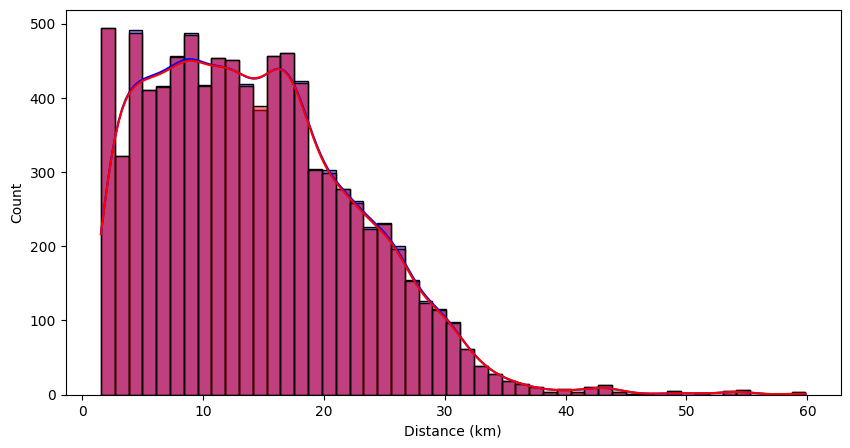

In [22]:
plt.figure(figsize=(10, 5))

sns.histplot(data=dataset, x='Distance (km)', kde=True, color='blue')
sns.histplot(data=dataset_cleaned, x='Distance (km)', kde=True, color='red')

<Axes: xlabel='Distance (km)', ylabel='delivery_time_minutes'>

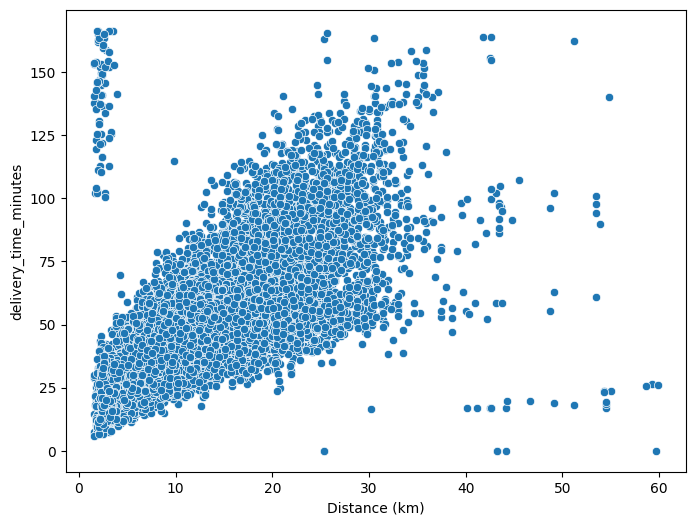

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x = 'Distance (km)', y = 'delivery_time_minutes')

In [24]:
dataset_encoded = dataset_cleaned.copy()
dataset_encoded = pd.get_dummies(dataset_encoded)

# **Multi Linear Regression**

In [25]:
X_encoded_lr = dataset_encoded.drop(columns=['delivery_time_minutes']).values
y_lr = dataset_encoded['delivery_time_minutes'].values

scaler_lr = StandardScaler()
X_lr = scaler_lr.fit_transform(X_encoded_lr)

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

regressor_lr = LinearRegression()
regressor_lr.fit(X_train_lr, y_train_lr)

y_pred_train_lr = regressor_lr.predict(X_train_lr)
y_pred_test_lr = regressor_lr.predict(X_test_lr)

train_mse_lr = mean_squared_error(y_train_lr, y_pred_train_lr)
test_mse_lr = mean_squared_error(y_test_lr, y_pred_test_lr)
train_mae_lr = mean_absolute_error(y_train_lr, y_pred_train_lr)
test_mae_lr = mean_absolute_error(y_test_lr, y_pred_test_lr)

In [26]:
print("The train MSE (LR): ", mean_squared_error(y_train_lr, y_pred_train_lr))
print("The train MAE (LR): ", mean_absolute_error(y_train_lr, y_pred_train_lr))

print("The test MSE (LR): ", mean_squared_error(y_test_lr, y_pred_test_lr))
print("The test MAE (LR): ", mean_absolute_error(y_test_lr, y_pred_test_lr))

The train MSE (LR):  344.5370235220084
The train MAE (LR):  13.151468800298199
The test MSE (LR):  289.16341304982865
The test MAE (LR):  12.55915758314423


In [27]:
for col in dataset.columns:

    print(col,":", dataset[col].nunique())

Traffic_Level : 5
weather_description : 11
Type_of_order : 4
Type_of_vehicle : 4
Delivery_person_Age : 22
Delivery_person_Ratings : 28
temperature_c : 1069
humidity : 64
precipitation : 35
Distance (km) : 2343
delivery_time_minutes : 3360


# **Piece Wise Regression**

In [28]:
dataset_encoded_pw = dataset_encoded.copy()
dataset_encoded_pw['Traffic_Level'] = dataset_cleaned['Traffic_Level']
traffic_groups = dataset_encoded_pw['Traffic_Level'].unique()
models_pw = {}

for traffic in traffic_groups:

    group_pw = dataset_encoded_pw[dataset_encoded_pw['Traffic_Level'] == traffic]
    X_group_pw = group_pw.drop(['delivery_time_minutes', 'Traffic_Level'], axis=1).values
    y_group_pw = group_pw['delivery_time_minutes'].values

    X_train_pw, X_test_pw, y_train_pw, y_test_pw = train_test_split(X_group_pw, y_group_pw, test_size=0.1, random_state=42)

    regressor_pw = LinearRegression()
    regressor_pw.fit(X_train_pw, y_train_pw)

    y_pred_train_pw = regressor_pw.predict(X_train_pw)
    y_pred_test_pw = regressor_pw.predict(X_test_pw)

    mse_train_pw = mean_squared_error(y_train_pw, y_pred_train_pw)
    mse_test_pw = mean_squared_error(y_test_pw, y_pred_test_pw)
    mae_train_pw = mean_absolute_error(y_train_pw, y_pred_train_pw)
    mae_test_pw = mean_absolute_error(y_test_pw, y_pred_test_pw)

    models_pw[traffic] = {
        'model': regressor_pw,
        'mse_train': mse_train_pw,
        'mse_test': mse_test_pw,
        'mae_train': mae_train_pw,
        'mae_test': mae_test_pw
    }

results_pw = []

for traffic, result in models_pw.items():
    results_pw.append({
        'Traffic Level': traffic,
        'Train MSE': result['mse_train'],
        'Test MSE': result['mse_test'],
        'Train MAE': result['mae_train'],
        'Test MAE': result['mae_test']
    })

results_df_pw = pd.DataFrame(results_pw)

print(results_df_pw)

  Traffic Level    Train MSE    Test MSE  Train MAE   Test MAE
0          High   202.165175  214.943149  12.306581  12.597095
1           Low    56.325854   55.039010   6.555699   6.309544
2      Moderate   110.412344  116.606749   9.210721   9.502729
3     Very High   610.400375  572.847270  19.609180  18.979768
4      Very Low  1259.115479  954.448128  23.961314  21.441254


# **Polynomial Regression**

In [29]:
X_encoded_poly = dataset_encoded.drop(columns=['delivery_time_minutes'])
y_poly = dataset_encoded['delivery_time_minutes']

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_encoded_poly, y_poly, test_size=0.2, random_state=42)

poly_reg = PolynomialFeatures(degree=2)
X_train_poly_transformed = poly_reg.fit_transform(X_train_poly)
X_test_poly_transformed = poly_reg.transform(X_test_poly)

poly_model = LinearRegression()
poly_model.fit(X_train_poly_transformed, y_train_poly)

y_train_pred_poly = poly_model.predict(X_train_poly_transformed)
y_test_pred_poly = poly_model.predict(X_test_poly_transformed)

train_mse_poly = mean_squared_error(y_train_poly, y_train_pred_poly)
test_mse_poly = mean_squared_error(y_test_poly, y_test_pred_poly)

train_mae_poly = mean_absolute_error(y_train_poly, y_train_pred_poly)
test_mae_poly = mean_absolute_error(y_test_poly, y_test_pred_poly)

print(f'Train MSE (Poly): {train_mse_poly}')
print(f'Test MSE (Poly): {test_mse_poly}')
print(f'Train MAE (Poly): {train_mae_poly}')
print(f'Test MAE (Poly): {test_mae_poly}')

Train MSE (Poly): 293.99424477425015
Test MSE (Poly): 278.6785926655538
Train MAE (Poly): 12.519386720758966
Test MAE (Poly): 12.568732867005593


# **Regression Comparison**

<Figure size 800x500 with 0 Axes>

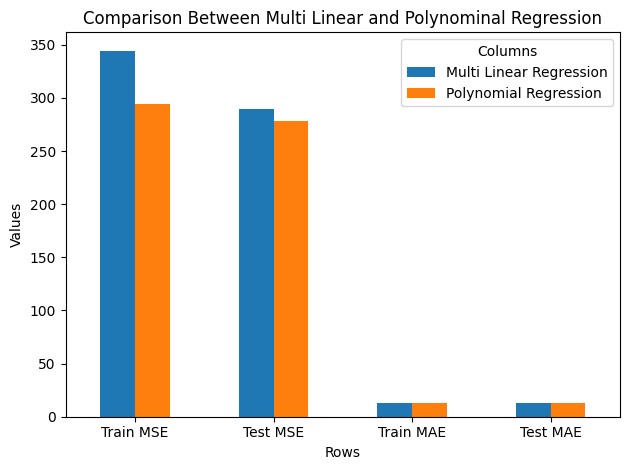

In [30]:
model_comparison_r = {
    'Multi Linear Regression': {
        'Train MSE': train_mse_lr,
        'Test MSE': test_mse_lr,
        'Train MAE': train_mae_lr,
        'Test MAE': test_mae_lr
    },
    'Polynomial Regression': {
        'Train MSE': train_mse_poly,
        'Test MSE': test_mse_poly,
        'Train MAE': train_mae_poly,
        'Test MAE': test_mae_poly
    }
}

comparison_df_r = pd.DataFrame(model_comparison_r)

plt.figure(figsize=(8, 5))
comparison_df_r.plot(kind='bar')
plt.title('Comparison Between Multi Linear and Polynominal Regression')
plt.xlabel('Rows')
plt.ylabel('Values')
plt.xticks(ticks=range(len(comparison_df_r)), labels=comparison_df_r.index, rotation=0)
plt.legend(title='Columns')
plt.tight_layout()
plt.show()

# **KNN**

In [31]:
y_knn = dataset_encoded['delivery_time_minutes']
X_knn = dataset_encoded.drop('delivery_time_minutes', axis=1)

scaler_knn = MinMaxScaler()
X_scaled_knn = scaler_knn.fit_transform(X_knn)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_scaled_knn, y_knn, test_size=0.2, random_state=42)

model_default_knn = KNeighborsRegressor()
model_default_knn.fit(X_train_knn, y_train_knn)

def evaluate_model_knn(model, X_train, X_test, y_train, y_test):
    y_train_pred_knn = model.predict(X_train)
    y_test_pred_knn = model.predict(X_test)

    train_mse_knn = mean_squared_error(y_train, y_train_pred_knn)
    train_mae_knn = mean_absolute_error(y_train, y_train_pred_knn)

    print("Train MSE KNN: ", train_mse_knn)
    print("Train MAE KNN: ", train_mae_knn)

    test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)
    test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)

    print("Test MSE KNN: ", test_mse_knn)
    print("Test MAE KNN: ", test_mae_knn)

evaluate_model_knn(model_default_knn, X_train_knn, X_test_knn, y_train_knn, y_test_knn)

Train MSE KNN:  252.99685333517698
Train MAE KNN:  10.960279314159292
Test MSE KNN:  305.2333487986726
Test MAE KNN:  12.903771017699116


In [32]:
results_knn = []

param_grid_knn = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

for n in param_grid_knn['n_neighbors']:
    for w in param_grid_knn['weights']:
        for p in param_grid_knn['p']:
            for algo in param_grid_knn['algorithm']:

                model_knn = KNeighborsRegressor(n_neighbors=n, weights=w, p=p, algorithm=algo)
                model_knn.fit(X_train_knn, y_train_knn)

                y_train_pred_knn = model_knn.predict(X_train_knn)
                y_test_pred_knn = model_knn.predict(X_test_knn)

                metrics_knn = {
                    "Train MSE KNN": mean_squared_error(y_train_knn, y_train_pred_knn),
                    "Train MAE KNN": mean_absolute_error(y_train_knn, y_train_pred_knn),
                    "Test MSE KNN": mean_squared_error(y_test_knn, y_test_pred_knn),
                    "Test MAE KNN": mean_absolute_error(y_test_knn, y_test_pred_knn),
                }

                results_knn.append({
                    'n_neighbors': n,
                    'weights': w,
                    'p': p,
                    'algorithm': algo,
                    **metrics_knn
                })

best_result_knn = min(results_knn, key=lambda x: (x['Test MSE KNN'], x['Test MAE KNN'], x['Train MSE KNN'], x['Train MAE KNN']))

In [33]:
print("Best Configuration for KNN:")
print(f"n_neighbors: {best_result_knn['n_neighbors']}")
print(f"weights: {best_result_knn['weights']}")
print(f"p: {best_result_knn['p']}")
print(f"algorithm: {best_result_knn['algorithm']}")
print("\nQuality Metrics for Best KNN Model:")
print(f"Train MSE KNN: {best_result_knn['Train MSE KNN']}")
print(f"Train MAE KNN: {best_result_knn['Train MAE KNN']}")
print(f"Test MSE KNN: {best_result_knn['Test MSE KNN']}")
print(f"Test MAE KNN: {best_result_knn['Test MAE KNN']}")

Best Configuration for KNN:
n_neighbors: 12
weights: uniform
p: 1
algorithm: auto

Quality Metrics for Best KNN Model:
Train MSE KNN: 282.92926481071777
Train MAE KNN: 11.954096607669618
Test MSE KNN: 267.3248483460853
Test MAE KNN: 12.276623340707964


# **Decision Tree**

In [34]:
y_dt = dataset_encoded['delivery_time_minutes']
X_dt = dataset_encoded.drop('delivery_time_minutes', axis=1)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train_dt, y_train_dt)

y_train_pred_dt = model_dt.predict(X_train_dt)
y_test_pred_dt = model_dt.predict(X_test_dt)

mse_train_dt = mean_squared_error(y_train_dt, y_train_pred_dt)
mae_train_dt = mean_absolute_error(y_train_dt, y_train_pred_dt)

mse_test_dt = mean_squared_error(y_test_dt, y_test_pred_dt)
mae_test_dt = mean_absolute_error(y_test_dt, y_test_pred_dt)

print(f"Train MSE DT: {mse_train_dt}")
print(f"Train MAE DT: {mae_train_dt}")
print(f"Test MSE DT: {mse_test_dt}")
print(f"Test MAE DT: {mae_test_dt}")


Train MSE DT: 0.002331602599557521
Train MAE DT: 0.0010301438053097343
Test MSE DT: 546.737785011062
Test MAE DT: 15.557527654867258


In [35]:
results_dt_tuning = []

param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'criterion': ['squared_error', 'friedman_mse', 'poisson', 'absolute_error'],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10]
}

for depth in param_grid_dt['max_depth']:
    for crit in param_grid_dt['criterion']:
        for min_leaf in param_grid_dt['min_samples_leaf']:
            for min_split in param_grid_dt['min_samples_split']:

                X_train_dt_tune, X_test_dt_tune, y_train_dt_tune, y_test_dt_tune = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

                model_dt_tune = DecisionTreeRegressor(max_depth=depth, criterion=crit,
                                                      min_samples_leaf=min_leaf, min_samples_split=min_split,
                                                      random_state=42)
                model_dt_tune.fit(X_train_dt_tune, y_train_dt_tune)

                y_train_pred_dt_tune = model_dt_tune.predict(X_train_dt_tune)
                y_test_pred_dt_tune = model_dt_tune.predict(X_test_dt_tune)

                mse_train_dt_tune = mean_squared_error(y_train_dt_tune, y_train_pred_dt_tune)
                mae_train_dt_tune = mean_absolute_error(y_train_dt_tune, y_train_pred_dt_tune)

                mse_test_dt_tune = mean_squared_error(y_test_dt_tune, y_test_pred_dt_tune)
                mae_test_dt_tune = mean_absolute_error(y_test_dt_tune, y_test_pred_dt_tune)

                results_dt_tuning.append({
                    'max_depth': depth, 'criterion': crit, 'min_samples_leaf': min_leaf,
                    'min_samples_split': min_split,
                    'MSE Train': mse_train_dt_tune, 'MAE Train': mae_train_dt_tune,
                    'MSE Test': mse_test_dt_tune, 'MAE Test': mae_test_dt_tune
                })

best_result_dt_tune = min(results_dt_tuning, key=lambda x: (x['MSE Test'], x['MAE Test'], x['MSE Train'], x['MAE Train']))

In [36]:
print("Best Configuration for Decision Tree Tuning:")
print(f"max_depth: {best_result_dt_tune['max_depth']}")
print(f"criterion: {best_result_dt_tune['criterion']}")
print(f"min_samples_leaf: {best_result_dt_tune['min_samples_leaf']}")
print(f"min_samples_split: {best_result_dt_tune['min_samples_split']}")
print("\nQuality Metrics for Best Model:")
print(f"MSE Train: {best_result_dt_tune['MSE Train']}")
print(f"MAE Train: {best_result_dt_tune['MAE Train']}")
print(f"MSE Test: {best_result_dt_tune['MSE Test']}")
print(f"MAE Test: {best_result_dt_tune['MAE Test']}")

Best Configuration for Decision Tree Tuning:
max_depth: 7
criterion: squared_error
min_samples_leaf: 10
min_samples_split: 2

Quality Metrics for Best Model:
MSE Train: 294.4553754013948
MAE Train: 12.295406785658502
MSE Test: 282.2938764576383
MAE Test: 12.464115277068137


# **Comparison Between Regression, KNN and Decision Trees**

In [37]:
model_comparison = {
    'Linear Regression': {
        'Train MSE': train_mse_lr,
        'Test MSE': test_mse_lr,
        'Train MAE': train_mae_lr,
        'Test MAE': test_mae_lr
    },
    'Polynomial Regression': {
        'Train MSE': train_mse_poly,
        'Test MSE': test_mse_poly,
        'Train MAE': train_mae_poly,
        'Test MAE': test_mae_poly
    },
    'Best KNN': {
        'Train MSE': best_result_knn['Train MSE KNN'],
        'Test MSE': best_result_knn['Test MSE KNN'],
        'Train MAE': best_result_knn['Train MAE KNN'],
        'Test MAE': best_result_knn['Test MAE KNN']
    },
    'Best Decision Tree': {
        'Train MSE': best_result_dt_tune['MSE Train'],
        'Test MSE': best_result_dt_tune['MSE Test'],
        'Train MAE': best_result_dt_tune['MAE Train'],
        'Test MAE': best_result_dt_tune['MAE Test']
    }
}

comparison_df = pd.DataFrame(model_comparison)

In [38]:
comparison_df

,Linear Regression,Polynomial Regression,Best KNN,Best Decision Tree
Train MSE,344.537024,293.994245,282.929265,294.455375
Test MSE,289.163413,278.678593,267.324848,282.293876
Train MAE,13.151469,12.519387,11.954097,12.295407
Test MAE,12.559158,12.568733,12.276623,12.464115


<Figure size 800x500 with 0 Axes>

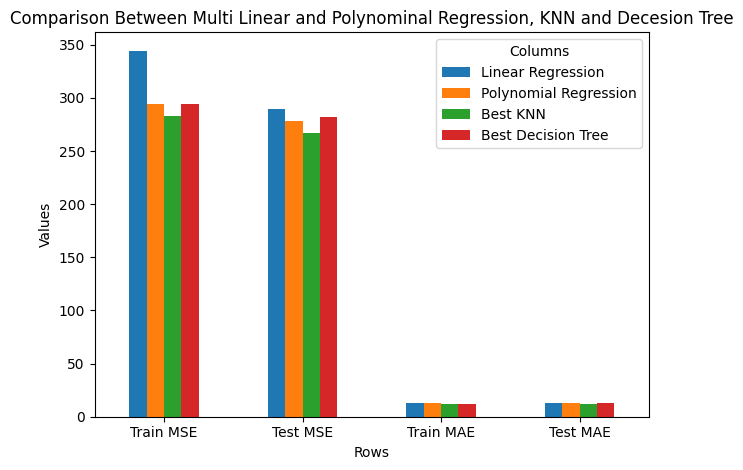

In [39]:
plt.figure(figsize=(8, 5))
comparison_df.plot(kind='bar')
plt.title('Comparison Between Multi Linear and Polynominal Regression, KNN and Decesion Tree')
plt.xlabel('Rows')
plt.ylabel('Values')
plt.xticks(ticks=range(len(comparison_df_r)), labels=comparison_df_r.index, rotation=0)
plt.legend(title='Columns')
plt.tight_layout()
plt.show()